In [1]:
import wikipedia as wiki # Wikipedia API
import pandas as pd
import spacy

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

nlp = spacy.load('en_core_web_sm')

In [42]:
pres_list = list(pd.read_csv('./presidents_list.csv')['President '])

In [43]:
pres_list.remove('Grover Cleveland (2nd term)')
pres_list.append('Donald Trump')

In [44]:
pres_list

['George Washington',
 'John Adams',
 'Thomas Jefferson',
 'James Madison',
 'James Monroe',
 'John Quincy Adams',
 'Andrew Jackson',
 'Martin Van Buren',
 'William Henry Harrison',
 'John Tyler',
 'James K. Polk',
 'Zachary Taylor',
 'Millard Fillmore',
 'Franklin Pierce',
 'James Buchanan',
 'Abraham Lincoln',
 'Andrew Johnson',
 'Ulysses S. Grant',
 'Rutherford B. Hayes',
 'James A. Garfield',
 'Chester A. Arthur',
 'Grover Cleveland',
 'Benjamin Harrison',
 'William McKinley',
 'Theodore Roosevelt',
 'William Howard Taft',
 'Woodrow Wilson',
 'Warren G. Harding',
 'Calvin Coolidge',
 'Herbert Hoover',
 'Franklin D. Roosevelt',
 'Harry S. Truman',
 'Dwight D. Eisenhower',
 'John F. Kennedy',
 'Lyndon B. Johnson',
 'Richard Nixon',
 'Gerald Ford',
 'Jimmy Carter',
 'Ronald Reagan',
 'George H. W. Bush',
 'Bill Clinton',
 'George W. Bush',
 'Barack Obama',
 'Donald Trump']

In [45]:
df = []

for pres in pres_list:
    p = {}
    p['president'] = pres
    p['content'] = wiki.page(pres).content
    df.append(p)

In [46]:
df = pd.DataFrame(df)[['president','content']]
df.set_index('president',inplace=True)
df.head()

,content
president,
George Washington,"George Washington (February 22, 1732 – Decembe..."
John Adams,John Adams (October 30 [O.S. October 19] 1735 ...
Thomas Jefferson,"Thomas Jefferson (April 13, [O.S. April 2] 174..."
James Madison,"James Madison Jr. (March 16, 1751 – June 28, 1..."
James Monroe,"James Monroe (; April 28, 1758 – July 4, 1831)..."


In [47]:
df.to_csv('./all_pres.csv')

In [48]:
tdf = df.T

In [49]:
presidents = list(tdf.columns)

ents = []
for pres in presidents:
    doc = nlp(tdf[pres][0])
    labels = dict(pd.Series([ent.label_ for ent in doc.ents]).value_counts(normalize=True))
    ents.append(labels)
ents = pd.DataFrame(ents, index=presidents)

In [50]:
ents = ents.T*100
ents.fillna(value=0, inplace=True)

In [51]:
ents.head()

,George Washington,John Adams,Thomas Jefferson,James Madison,James Monroe,John Quincy Adams,Andrew Jackson,Martin Van Buren,William Henry Harrison,John Tyler,...,Lyndon B. Johnson,Richard Nixon,Gerald Ford,Jimmy Carter,Ronald Reagan,George H. W. Bush,Bill Clinton,George W. Bush,Barack Obama,Donald Trump
CARDINAL,6.462732,4.781421,3.957916,3.659447,2.704577,3.028468,4.103406,3.506651,4.699739,4.539642,...,5.582524,3.863752,4.836272,3.794540,5.804524,3.963809,4.188759,4.528986,4.130731,5.229937
DATE,12.925463,11.429872,14.879760,10.679612,12.066574,10.115082,12.146081,12.273277,15.578764,13.235294,...,14.482201,14.641586,15.617128,16.890329,17.328212,17.018526,17.179215,16.530797,23.014072,20.063120
EVENT,1.766480,1.502732,1.052104,2.315161,1.872399,1.090248,1.436192,1.813785,1.740644,1.023018,...,1.213592,2.491103,1.612091,1.249422,2.304738,1.680310,1.537646,2.355072,1.270994,0.360685
FAC,0.904782,0.455373,0.701403,1.045556,0.832178,0.847971,1.189988,0.725514,0.522193,0.575448,...,0.970874,1.016777,1.460957,1.110597,1.195049,1.507971,0.954401,0.543478,1.543350,0.856628
GPE,29.125377,15.346084,13.627255,16.131441,35.575589,21.502120,17.726713,17.533253,16.710183,14.450128,...,13.470874,13.980681,16.171285,16.242480,14.468630,16.587678,13.255567,16.983696,16.159782,16.140667


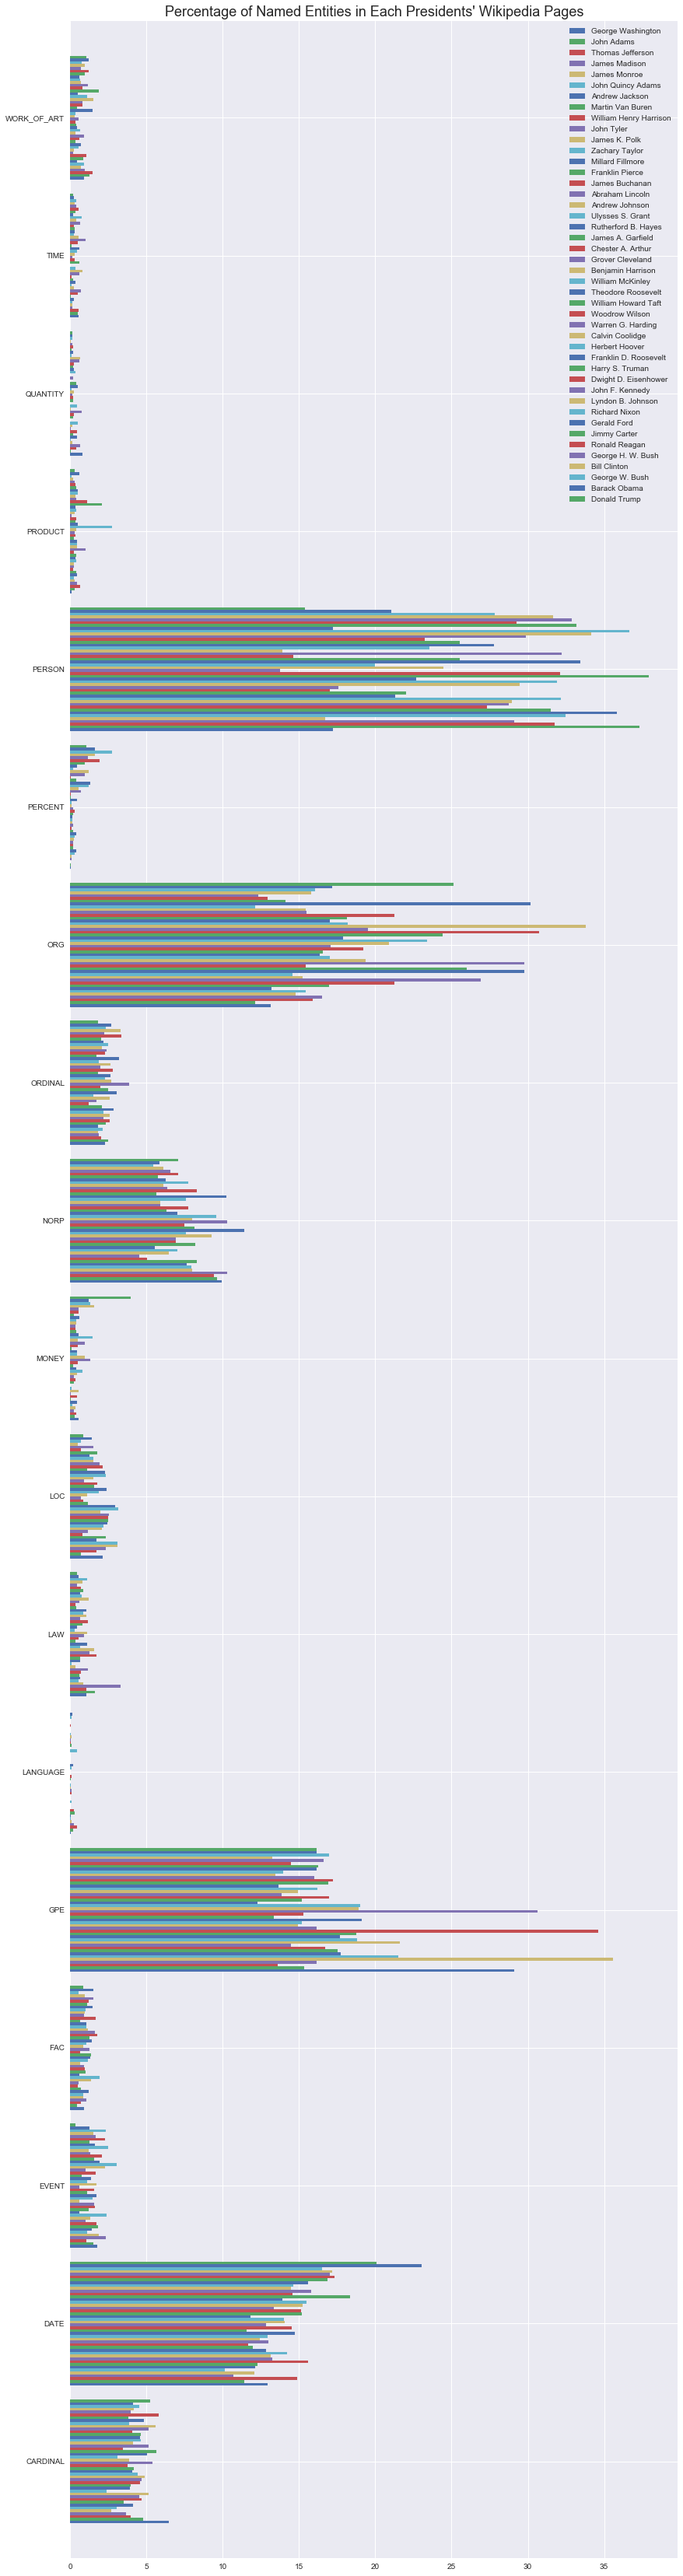

In [56]:
ents.plot.barh(figsize=(14,60),width=0.9);
plt.title("Percentage of Named Entities in Each Presidents' Wikipedia Pages", fontsize=18);